In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_excel(r'Data diolah darin - Copy.xlsx')
df

,Backhoe,HP(watt),Norm_MAP,RPM,Age,Load_Factor,Engine_Tier,TEMP[C],Fuel[g/s],NOx[g/s],...,NOx[g/hr],HC[g/hr],CO[g/hr],CO2[g/hr],PM[mg/hr],Nox (g/kl),HC (g/kl),CO (g/kl),CO2 (g/kl),PM (g/kl)
0,1,65621.6,0.000000,833.0,12,0.21,2,22.0,0.430000,0.024090,...,86.724000,25.848000,13.176000,4780.656000,14.4,3730.117500,1111.757728,566.717728,2.056225e+05,0.619362
1,1,65621.6,0.012346,800.0,12,0.21,2,22.0,0.620000,0.030320,...,109.152000,25.668000,16.164000,7008.264000,21.6,4694.776362,1104.015681,695.235681,3.014350e+05,0.929047
2,1,65621.6,0.012346,826.0,12,0.21,2,22.0,0.510000,0.030730,...,110.628000,10.980000,10.584000,5722.920000,21.6,4758.261138,472.264772,455.232272,2.461506e+05,0.929047
3,1,65621.6,0.012346,831.0,12,0.21,2,22.0,0.390522,0.023693,...,85.293664,20.747853,4.825082,4382.553038,21.6,3668.596780,892.393432,207.533355,1.884996e+05,0.929047
4,1,65621.6,0.012346,834.0,12,0.21,2,22.0,0.413024,0.026107,...,93.985262,6.979907,9.880556,4673.503069,21.6,4042.434273,300.215326,424.976193,2.010137e+05,0.929047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,8,72332.9,0.975904,1676.0,36,0.21,2,41.0,1.590000,0.058830,...,211.788000,19.908000,28.152000,17957.592000,1800.0,445343.100000,41862.100000,59197.400000,3.776083e+07,3785.000000
37524,8,72332.9,0.975904,1683.0,36,0.21,2,42.0,1.320000,0.059500,...,214.200000,19.800000,30.780000,14905.044000,1656.0,542545.340909,50151.250000,77962.397727,3.775286e+07,4194.468182
37525,8,72332.9,0.975904,1846.0,36,0.21,2,42.0,1.530000,0.059640,...,214.704000,21.744000,33.840000,17349.048000,1872.0,469179.694118,47515.850980,73948.509804,3.791183e+07,4090.768627
37526,8,72332.9,0.987952,1876.0,36,0.21,2,42.0,1.760000,0.056200,...,202.320000,22.356000,34.740000,19948.572000,1980.0,384340.943182,42468.990341,65994.485795,3.789568e+07,3761.343750


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37528 entries, 0 to 37527
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Backhoe      37528 non-null  int64  
 1   HP(watt)     37528 non-null  float64
 2   Norm_MAP     37528 non-null  float64
 3   RPM          37527 non-null  float64
 4   Age          37528 non-null  int64  
 5   Load_Factor  37528 non-null  float64
 6   Engine_Tier  37528 non-null  int64  
 7   TEMP[C]      37527 non-null  float64
 8   Fuel[g/s]    37528 non-null  float64
 9   NOx[g/s]     37528 non-null  float64
 10  HC[g/s]      37528 non-null  float64
 11  CO[g/s]      37528 non-null  float64
 12  CO2[g/s]     37528 non-null  float64
 13  PM[mg/s]     37528 non-null  float64
 14  Nox (g/l)    37528 non-null  float64
 15  HC (g/l)     37528 non-null  float64
 16  CO (g/l)     37528 non-null  float64
 17  CO2 (g/l)    37528 non-null  float64
 18  PM (g/l)     37528 non-null  float64
 19  Fuel

In [4]:
df.dropna(inplace=True)

**NOx**

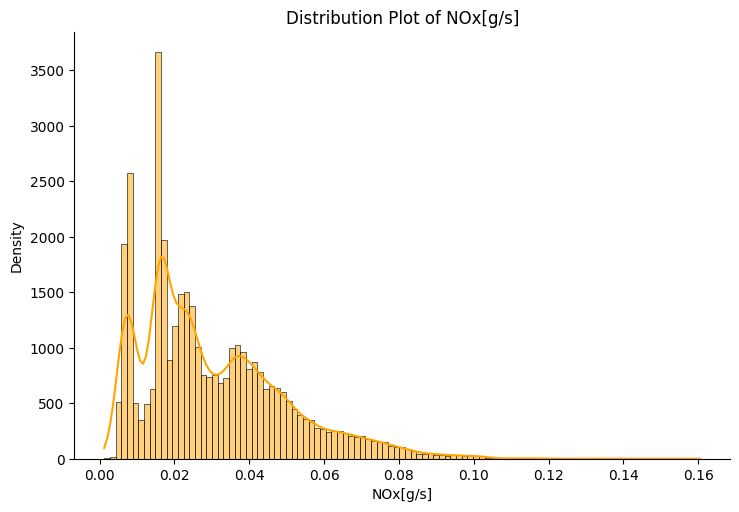

In [5]:
sns.displot(df['NOx[g/s]'], kde=True, height=5, aspect=1.5, color='orange')
plt.title('Distribution Plot of NOx[g/s]')
plt.xlabel('NOx[g/s]')
plt.ylabel('Density')
plt.show()

In [6]:
skewness_nox = skew(df['NOx[g/s]'], bias=True, nan_policy='omit')
kurtosis_nox = kurtosis(df['NOx[g/s]'], nan_policy='omit')

print("\nSkewness (NOx[g/s]):")
print(skewness_nox)
print("\nKurtosis (NOx[g/s]):")
print(kurtosis_nox)


Skewness (NOx[g/s]):
1.0385038342630495

Kurtosis (NOx[g/s]):
1.0443586681328556


**HC**

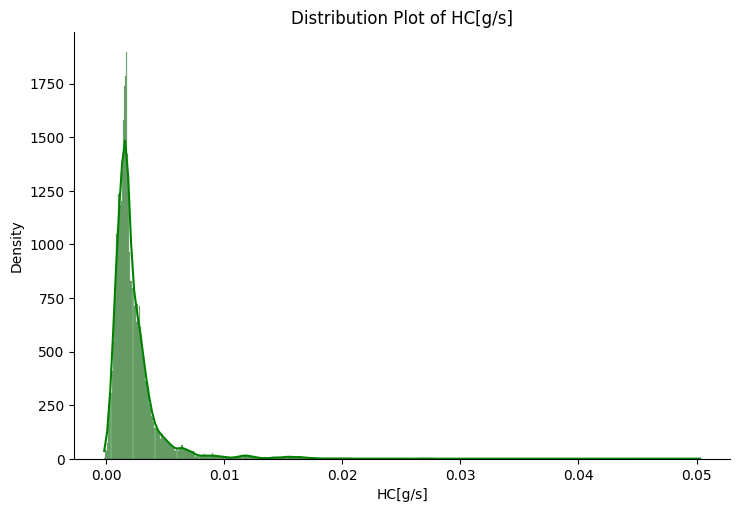

In [7]:
sns.displot(df['HC[g/s]'], kde=True, height=5, aspect=1.5, color='green')
plt.title('Distribution Plot of HC[g/s]')
plt.xlabel('HC[g/s]')
plt.ylabel('Density')
plt.show()

In [8]:
skewness_hc = skew(df['HC[g/s]'], bias=True, nan_policy='omit')
kurtosis_hc = kurtosis(df['HC[g/s]'], nan_policy='omit')

print("\nSkewness (HC[g/s]):")
print(skewness_hc)
print("\nKurtosis (HC[g/s]):")
print(kurtosis_hc)


Skewness (HC[g/s]):
4.371823683918534

Kurtosis (HC[g/s]):
31.15542525791672


**CO**

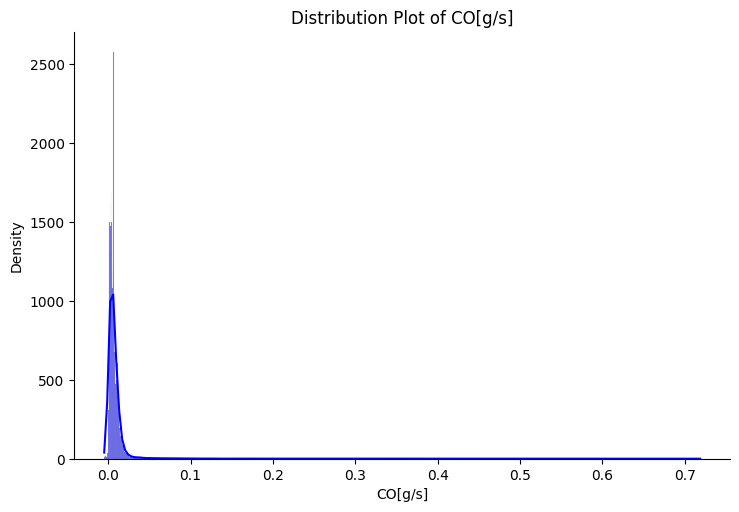

In [9]:
sns.displot(df['CO[g/s]'], kde=True, height=5, aspect=1.5, color='blue')
plt.title('Distribution Plot of CO[g/s]')
plt.xlabel('CO[g/s]')
plt.ylabel('Density')
plt.show()

In [10]:
skewness_co = skew(df['CO[g/s]'], bias=True, nan_policy='omit')
kurtosis_co = kurtosis(df['CO[g/s]'], nan_policy='omit')

print("\nSkewness (CO[g/s]):")
print(skewness_co)
print("\nKurtosis (CO[g/s]):")
print(kurtosis_co)


Skewness (CO[g/s]):
15.33741520249641

Kurtosis (CO[g/s]):
321.6777765728953
